Group Project: Flight Delays and Cancellations Analysis

### 1. Introduction to the Dataset

The U.S. Department of Transportation's (DOT) [Buereau of Transportation Statistics](https://www.bts.gov/) tracks the performance of domestic flights operated by large airline carriers. 

In this project we will work with [dataset](https://www.kaggle.com/usdot/flight-delays) compiled by Kaggle providing summary information on the number of on-time, delayed, canceled, and diverted flights published by DOT's montly Air Travel Consumer [Report](https://www.transportation.gov/airconsumer/air-travel-consumer-reports) for the year 2015. 

#### 1.1 Acknowledgements
[Kaggle](https://www.kaggle.com) and DOT's Bureau of Transportation Statistics. 

### 2. Dataset and [Data Dictionary](https://www.kaggle.com/usdot/flight-delays/data)

The raw dataset includes three files: airlines.csv, airports.csv, flights_20_perc.csv. They are saved in the data-sets folder for you. Use the [link](https://www.kaggle.com/usdot/flight-delays/data) to get yourself familiar with the column metadata for each of the files included in the dataset. 

Also, note that the file (flights_20_perc.csv) only contains 20% random sample of the original data available on Kaggle. It still has information on 1 million flights. This reduction was done to make the dataset size manageable for new programmers. 


### 3. Project Details
Flight delays and cancellations are typical problems all of us face when traveling. The airports and airline industry try to minimize the impact on the customers and improve their experience. On the other hand, the airline industry also optimizes the flights to fly through their network of cities. For example, a flight from Seattle flies to Chicago, and then is further scheduled to fly from Chicago to New York City. As a result of this efficient utilization of the flights, a popular belief among travelers is that **flight delays or cancellations happen more often as the day progresses**. Though it seems intuitive, it is our job as data scientists to analyze the data and prove/disprove the popular assumptions. 

#### 3.1 Required Analysis
Use the data to prove or disprove the following claims. Your analysis should be accompanied by visualizations where appropriate. Not every answer needs a visualization; it is up to you to decide where a visualization is needed or appropriate.

1. Do flight delays happen more often later in the day compared to earlier in the day? (20 points)
2. Does the response to Claim 1 depend on the month of the year? (10 points)
3. Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced? (10 points)
4. Do flight cancellation happen more often later in the day than earlier in the day? (20 points)
5. Does the response to Claim 4 depend on the month of the year? (10 points)
6. Does the response to Claim 4 depend on the airline? (10 points)
7. State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states have lowest and highest flight delays. (20 points)


#### Hint:

Some of the questions above require understanding of pandas GroupBy. For example, group by hour of the day or month or airline, etc, and aggregating various informations that will support your arguments.  

#### 3.2 Important Notes
1. I do not know if any of the above claims are true in the data I provided. So, do not only attempt to prove them, you could disprove them as well. There is no one right answer. Your responses are graded based on the strength of the arguments and validity of your analysis to make your points with the data.
2. For each claim, please start with the description in a Markdown cell. Then write Python code to analyze the data and prove/disprove the claim. After the code, please write a short paragraph in a Makdown cell to explain your analysis. 
3. The data (flights_20_perc.csv) is still a **large data file**. You will have to learn (which operations create a copy of the DataFrame, which operations just manipulate original DataFrame) to work with the large amount of data without requiring too much memory. 
    * Most importantly, learn how to use the keyword argument `inplace=True`. In this way you are modifying the existing `DataFrame` rather than create a copy. 
    
#### 3.3 Bonus Points Opportunity (20 points)
We investigated above if there is a pattern that the delays in the flights happen more often as the day progresses. Explore and find more interesting patterns (not necessarily based on delays or cancellations) from the data. This bonus question is only to pick your analytical and creative mind. Although this data (airlines.csv, flights_20_perc.csv, airports.csv) is your primary data, you may chose to combine other supplementary datasets for your analysis.

My advice is to work on this bonus part only after finishing the required analysis above and do not spend too much time on this bonus question.

Only submissions with the most interesting findings will get this additional bonus points. Judgement will be made on correctness, innovativeness/creativeness, strength of the argument, and the rigor in the data analysis. The bonus points will be added to your project score.
 

### 4 Submission Expectations and Requirements

#### 4.1 Project report: 
Please combine your data analysis (Python code) and results explanation (Markdown) in one Jupyter notebook. That is your final project report. Make sure your python code and explanation narrative are clearly differentiated in seperate code and markdown cells. You can start your report after the "STARTER CODE" cell. 


#### 4.2 Submission and Due Date
You will submit your final project report via the Submit button on Vocareum, exactly as in the assignments you did throughout the course. 

The project is due on <b>Thursday, Feb 27 at 11:59PM Eastern.</b> There will be no exceptions i.e. no late submissions will be accepted.

In [1]:
## STARTER CODE

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Loading the dataset. 
# The following statements should get the three data files loaded as DataFrames. 
airlines = pd.read_csv("data-sets/airlines.csv")
#airlines.head()
airports = pd.read_csv("data-sets/airports.csv")
#airports.head()
flights_1  = pd.read_csv("data-sets/flights_20_perc.csv",parse_dates=[['YEAR', 'MONTH','DAY']])
#flights.head()

flights  = pd.read_csv("data-sets/flights_20_perc.csv")

In [2]:
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0


2.3.0


In [3]:
airlines.head()
#airlines.info()
#airlines.describe()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airlines['IATA_CODE'].nunique()

14

In [5]:
airports.head()
#airports.info()
#airports.describe()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [7]:
airports['IATA_CODE'].nunique()

322

In [8]:
flights['IATA_CODE']=flights['DESTINATION_AIRPORT']

In [9]:
flights['ORIGIN_AIRPORT']


Airport_Flights_1=pd.merge(flights,airports,how='left', right_on='IATA_CODE', left_on='DESTINATION_AIRPORT')

Airport_Flights=pd.merge(airports,flights,how='inner',on='IATA_CODE')

In [10]:
Airport_Flights[['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'DESTINATION_AIRPORT']].head(4)


,IATA_CODE,AIRPORT,CITY,STATE,DESTINATION_AIRPORT
0,ABE,Lehigh Valley International Airport,Allentown,PA,ABE
1,ABE,Lehigh Valley International Airport,Allentown,PA,ABE
2,ABE,Lehigh Valley International Airport,Allentown,PA,ABE
3,ABE,Lehigh Valley International Airport,Allentown,PA,ABE


In [75]:
#Airport_Flights.info()


In [76]:
#flights.info()
#flights.describe()

In [13]:
flights['ARRIVAL_DELAY'].head(5)

0    -2.0
1   -22.0
2   -11.0
3   -15.0
4     0.0
Name: ARRIVAL_DELAY, dtype: float64

# 1.Do flight delays happen more often later in the day compared to earlier in the day?



I define flight delays is the flights that arrived the destination later than the secheduled time.
If the ARRIVAL_DELAY >0, then I can define the flight is delay.
I define hour of the day <= 12 is  earlier of the day.
I define hour of the day > 12 is  late of the day.
If the number of flight delay later in the day more than flight delay earlier in the day, I can say flight delays happen more often later in the day compared to earlier in the day.

In [14]:
Delays=flights[flights['ARRIVAL_DELAY']>0]

In [15]:
# The delayed flights that arrive at destination later than 12:00, which is later in the day

later_arrive_delay=Delays[Delays['ARRIVAL_TIME']>1200]['ARRIVAL_DELAY'].count()
later_arrive_delay

312887

In [16]:
# The delayed flights that arrive at destination no later than 12:00, which is early in the day
earlier_arrive_delay=Delays[Delays['ARRIVAL_TIME']<=1200]['ARRIVAL_DELAY'].count()
earlier_arrive_delay

104513

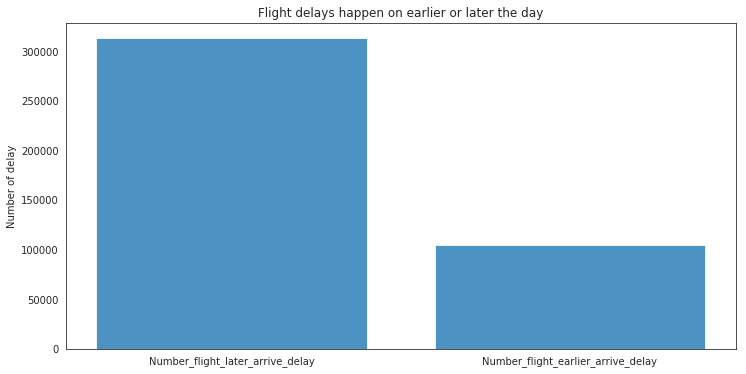

In [17]:
plt.figure(figsize=(12,6))
sns.set_style('white')

objects = ('Number_flight_later_arrive_delay','Number_flight_earlier_arrive_delay')
y_pos = np.arange(len(objects))
performance = [later_arrive_delay,earlier_arrive_delay]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Number of delay')
plt.title('Flight delays happen on earlier or later the day')

plt.show()


## #From above result and graph, we can see that there were 312887 delayed flights that arrive at destination later than 12:00, while there were 104513 delayed flights that arrive at destination no later than 12:00.So more flights arrived arrive at destination later in the day than flights arrived arrive at destination earlier in the day. 

# Q2:Does the response to Claim 1 depend on the month of the year?

#### The hypothesis for Claim 1 will be used in this problem
#### I will check the delays for each month by group delayed airlines by month
#### Then I will check the  flights delay of early and later in the day of each month to see the pattern.

In [18]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE'],
      dtype='object')

In [19]:
Delays.groupby('MONTH').count().sort_values(by='ARRIVAL_DELAY')

,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
MONTH,,,,,,,,,,,,,,,,,,,,,
9,26643,26643,26643,26643,26643,26643,26643,26643,26643,26643,...,26643,26643,26643,0,11911,11911,11911,11911,11911,26643
10,28028,28028,28028,28028,28028,28028,28028,28028,28028,28028,...,28028,28028,28028,0,11900,11900,11900,11900,11900,28028
11,29684,29684,29684,29684,29684,29684,29684,29684,29684,29684,...,29684,29684,29684,0,14020,14020,14020,14020,14020,29684
4,34624,34624,34624,34624,34624,34624,34624,34624,34624,34624,...,34624,34624,34624,0,16562,16562,16562,16562,16562,34624
2,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,...,35034,35034,35034,0,19096,19096,19096,19096,19096,35034
5,35255,35255,35255,35255,35255,35255,35255,35255,35255,35255,...,35255,35255,35255,0,18075,18075,18075,18075,18075,35255
12,35791,35791,35791,35791,35791,35791,35791,35791,35791,35791,...,35791,35791,35791,0,19208,19208,19208,19208,19208,35791
8,36118,36118,36118,36118,36118,36118,36118,36118,36118,36118,...,36118,36118,36118,0,18813,18813,18813,18813,18813,36118
1,36596,36596,36596,36596,36596,36596,36596,36596,36596,36596,...,36596,36596,36596,0,19041,19041,19041,19041,19041,36596


Text(0.5,0,'Month')

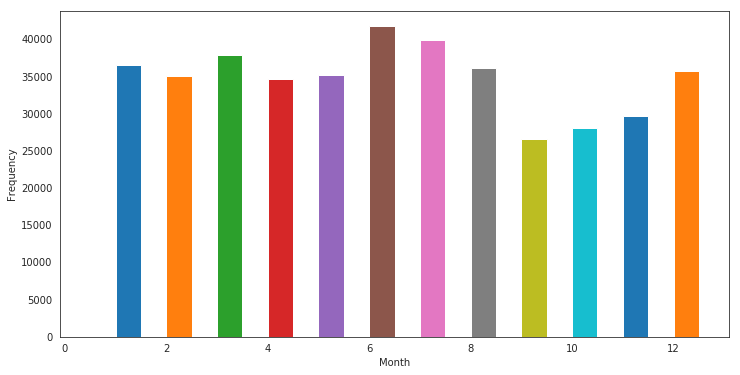

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('white')

Delays.groupby('MONTH')['MONTH'].plot.hist(width = 0.5)
plt.xlabel('Month')

In [21]:
LaterDayArrival_Month=Delays[Delays['ARRIVAL_TIME']>1200].groupby('MONTH').count()
LaterDayArrival_Month.rename(columns = {'ARRIVAL_DELAY':'Monthly_Number_flight_delay_later'},inplace=True)

Delays[Delays['ARRIVAL_TIME']>1200].groupby('MONTH').count().sort_values(by='ARRIVAL_DELAY')

,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
MONTH,,,,,,,,,,,,,,,,,,,,,
9,20190,20190,20190,20190,20190,20190,20190,20190,20190,20190,...,20190,20190,20190,0,9513,9513,9513,9513,9513,20190
10,21008,21008,21008,21008,21008,21008,21008,21008,21008,21008,...,21008,21008,21008,0,9447,9447,9447,9447,9447,21008
11,22237,22237,22237,22237,22237,22237,22237,22237,22237,22237,...,22237,22237,22237,0,10854,10854,10854,10854,10854,22237
4,25544,25544,25544,25544,25544,25544,25544,25544,25544,25544,...,25544,25544,25544,0,12720,12720,12720,12720,12720,25544
12,26314,26314,26314,26314,26314,26314,26314,26314,26314,26314,...,26314,26314,26314,0,14570,14570,14570,14570,14570,26314
5,26793,26793,26793,26793,26793,26793,26793,26793,26793,26793,...,26793,26793,26793,0,14308,14308,14308,14308,14308,26793
2,27047,27047,27047,27047,27047,27047,27047,27047,27047,27047,...,27047,27047,27047,0,15231,15231,15231,15231,15231,27047
8,27076,27076,27076,27076,27076,27076,27076,27076,27076,27076,...,27076,27076,27076,0,14776,14776,14776,14776,14776,27076
1,27968,27968,27968,27968,27968,27968,27968,27968,27968,27968,...,27968,27968,27968,0,15041,15041,15041,15041,15041,27968


In [22]:
EarlierDayArrival_Month=Delays[Delays['ARRIVAL_TIME']<=1200].groupby('MONTH').count()
EarlierDayArrival_Month.rename(columns = {'ARRIVAL_DELAY':'Monthly_Number_flight_delay_ealier'},inplace=True)

Delays[Delays['ARRIVAL_TIME']<=1200].groupby('MONTH').count().sort_values(by='ARRIVAL_DELAY')

,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
MONTH,,,,,,,,,,,,,,,,,,,,,
9,6453,6453,6453,6453,6453,6453,6453,6453,6453,6453,...,6453,6453,6453,0,2398,2398,2398,2398,2398,6453
10,7020,7020,7020,7020,7020,7020,7020,7020,7020,7020,...,7020,7020,7020,0,2453,2453,2453,2453,2453,7020
11,7447,7447,7447,7447,7447,7447,7447,7447,7447,7447,...,7447,7447,7447,0,3166,3166,3166,3166,3166,7447
2,7987,7987,7987,7987,7987,7987,7987,7987,7987,7987,...,7987,7987,7987,0,3865,3865,3865,3865,3865,7987
5,8462,8462,8462,8462,8462,8462,8462,8462,8462,8462,...,8462,8462,8462,0,3767,3767,3767,3767,3767,8462
1,8628,8628,8628,8628,8628,8628,8628,8628,8628,8628,...,8628,8628,8628,0,4000,4000,4000,4000,4000,8628
8,9042,9042,9042,9042,9042,9042,9042,9042,9042,9042,...,9042,9042,9042,0,4037,4037,4037,4037,4037,9042
4,9080,9080,9080,9080,9080,9080,9080,9080,9080,9080,...,9080,9080,9080,0,3842,3842,3842,3842,3842,9080
3,9419,9419,9419,9419,9419,9419,9419,9419,9419,9419,...,9419,9419,9419,0,4213,4213,4213,4213,4213,9419


Text(0.5,1,'Flight delays happen on later or earlier in the day by month')

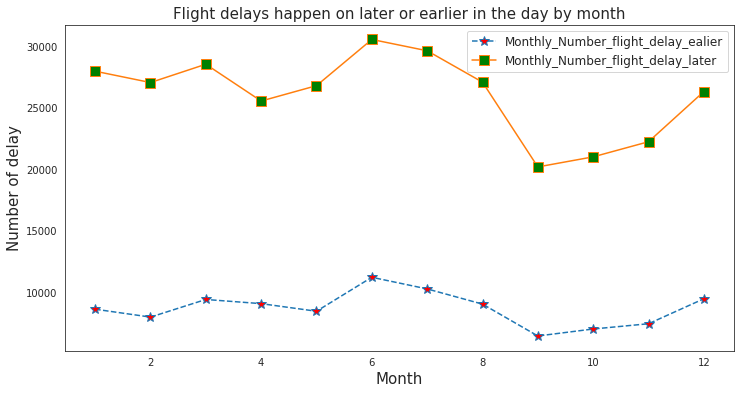

In [23]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(EarlierDayArrival_Month.index, EarlierDayArrival_Month['Monthly_Number_flight_delay_ealier'], 
          linestyle='--',marker='*',markersize=10,markerfacecolor='red')
axes.plot(LaterDayArrival_Month.index, LaterDayArrival_Month['Monthly_Number_flight_delay_later'],
          marker='s',markersize=10,markerfacecolor='green')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of delay',fontsize = 15)
axes.set_xlabel('Month',fontsize = 15)
axes.set_title(label = 'Flight delays happen on later or earlier in the day by month',fontsize = 15)

## From above graph, we can see that the September have the minimum flights delays,which is 26643; while Jun have the maximum flights delays,which is 41769. But there difference between the minimum flights delays and maximum flights delays is not big, which is 15126.  From the second graph we can that for every month there were more flights delayed in the later of day than in the earlier of the day. 

## Q3:Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced? 

#### The hypothesis for Claim 1 will be used in this problem
#### I will check the delays for each airlines by group delayed flights by airline 
#### Then I will check the  flights delay of early and later in the day to see the pattern.

In [24]:
Delays.groupby('AIRLINE').count().sort_values(by='ARRIVAL_DELAY')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
AIRLINE,,,,,,,,,,,,,,,,,,,,,
VX,4966,4966,4966,4966,4966,4966,4966,4966,4966,4966,...,4966,4966,4966,0,2360,2360,2360,2360,2360,4966
HA,6080,6080,6080,6080,6080,6080,6080,6080,6080,6080,...,6080,6080,6080,0,1777,1777,1777,1777,1777,6080
F9,8169,8169,8169,8169,8169,8169,8169,8169,8169,8169,...,8169,8169,8169,0,4718,4718,4718,4718,4718,8169
AS,11339,11339,11339,11339,11339,11339,11339,11339,11339,11339,...,11339,11339,11339,0,4488,4488,4488,4488,4488,11339
NK,11367,11367,11367,11367,11367,11367,11367,11367,11367,11367,...,11367,11367,11367,0,6840,6840,6840,6840,6840,11367
US,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312,...,15312,15312,15312,0,7292,7292,7292,7292,7292,15312
B6,20420,20420,20420,20420,20420,20420,20420,20420,20420,20420,...,20420,20420,20420,0,11772,11772,11772,11772,11772,20420
MQ,20659,20659,20659,20659,20659,20659,20659,20659,20659,20659,...,20659,20659,20659,0,12082,12082,12082,12082,12082,20659
UA,37542,37542,37542,37542,37542,37542,37542,37542,37542,37542,...,37542,37542,37542,0,21280,21280,21280,21280,21280,37542


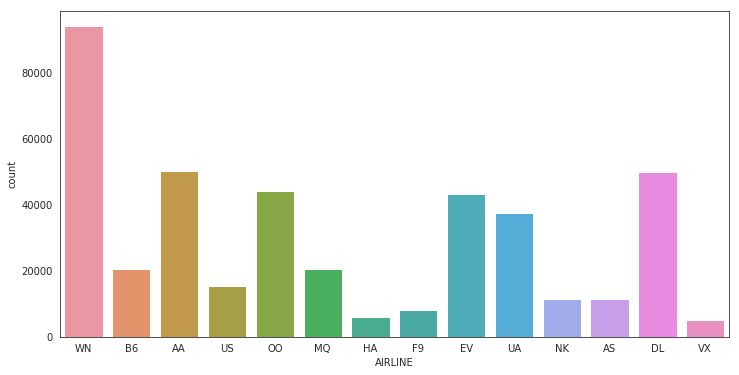

In [25]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='AIRLINE', data=Delays)

In [26]:
EarlierDayArrival_AIRLINE=Delays[Delays['ARRIVAL_TIME']<=1200].groupby('AIRLINE').count()
EarlierDayArrival_AIRLINE.rename(columns = {'ARRIVAL_DELAY':'AIRLINE_Number_flight_delay_ealier'},inplace=True)

Delays[Delays['ARRIVAL_TIME']<=1200].groupby('AIRLINE').count().sort_values(by='ARRIVAL_DELAY')




,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
AIRLINE,,,,,,,,,,,,,,,,,,,,,
VX,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,...,1053,1053,1053,0,432,432,432,432,432,1053
HA,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,...,1498,1498,1498,0,297,297,297,297,297,1498
F9,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,...,2339,2339,2339,0,1313,1313,1313,1313,1313,2339
AS,3235,3235,3235,3235,3235,3235,3235,3235,3235,3235,...,3235,3235,3235,0,1181,1181,1181,1181,1181,3235
NK,3961,3961,3961,3961,3961,3961,3961,3961,3961,3961,...,3961,3961,3961,0,2328,2328,2328,2328,2328,3961
US,4148,4148,4148,4148,4148,4148,4148,4148,4148,4148,...,4148,4148,4148,0,1710,1710,1710,1710,1710,4148
MQ,5429,5429,5429,5429,5429,5429,5429,5429,5429,5429,...,5429,5429,5429,0,2653,2653,2653,2653,2653,5429
B6,6088,6088,6088,6088,6088,6088,6088,6088,6088,6088,...,6088,6088,6088,0,3350,3350,3350,3350,3350,6088
UA,9757,9757,9757,9757,9757,9757,9757,9757,9757,9757,...,9757,9757,9757,0,5085,5085,5085,5085,5085,9757


In [27]:
LaterDayArrival_AIRLINE=Delays[Delays['ARRIVAL_TIME']>1200].groupby('AIRLINE').count()
LaterDayArrival_AIRLINE.rename(columns = {'ARRIVAL_DELAY':'AIRLINE_Number_flight_delay_later'},inplace=True)

Delays[Delays['ARRIVAL_TIME']>1200].groupby('AIRLINE').count().sort_values(by='ARRIVAL_DELAY')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
AIRLINE,,,,,,,,,,,,,,,,,,,,,
VX,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,...,3913,3913,3913,0,1928,1928,1928,1928,1928,3913
HA,4582,4582,4582,4582,4582,4582,4582,4582,4582,4582,...,4582,4582,4582,0,1480,1480,1480,1480,1480,4582
F9,5830,5830,5830,5830,5830,5830,5830,5830,5830,5830,...,5830,5830,5830,0,3405,3405,3405,3405,3405,5830
NK,7406,7406,7406,7406,7406,7406,7406,7406,7406,7406,...,7406,7406,7406,0,4512,4512,4512,4512,4512,7406
AS,8104,8104,8104,8104,8104,8104,8104,8104,8104,8104,...,8104,8104,8104,0,3307,3307,3307,3307,3307,8104
US,11164,11164,11164,11164,11164,11164,11164,11164,11164,11164,...,11164,11164,11164,0,5582,5582,5582,5582,5582,11164
B6,14332,14332,14332,14332,14332,14332,14332,14332,14332,14332,...,14332,14332,14332,0,8422,8422,8422,8422,8422,14332
MQ,15230,15230,15230,15230,15230,15230,15230,15230,15230,15230,...,15230,15230,15230,0,9429,9429,9429,9429,9429,15230
UA,27785,27785,27785,27785,27785,27785,27785,27785,27785,27785,...,27785,27785,27785,0,16195,16195,16195,16195,16195,27785


Text(0.5,1,'Flight delays happen on later or earlier in the day by AIRLINE')

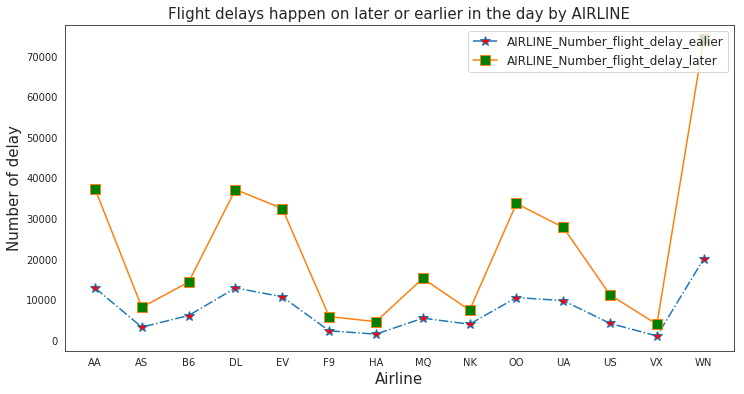

In [28]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(EarlierDayArrival_AIRLINE.index, EarlierDayArrival_AIRLINE['AIRLINE_Number_flight_delay_ealier'], 
          linestyle='-.',marker='*',markersize=10,markerfacecolor='red')
axes.plot(LaterDayArrival_AIRLINE.index, LaterDayArrival_AIRLINE['AIRLINE_Number_flight_delay_later'],
          marker='s',markersize=10,markerfacecolor='green')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of delay',fontsize = 15)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Flight delays happen on later or earlier in the day by AIRLINE',fontsize = 15)


### From first graph above , we can see that the  airline VX have the minimum flights delays,which is 4966; while  airline WN have the maximum flights delays,which is 94107. But there difference between the minimum flights delays and maximum flights delays is huge. So we can conclude that the flights delays depend on the airline.   From the second graph, we can see that for each airline there were more flights delayed in the later of day than in the earlier of the day.  

### Q4:Do flight cancellation happen more often later in the day than earlier in the day?
#### we assume that flights cancelled were segmented into two categories: 1.scheduled to departure later than 12:00(which is later in the day) were canclled. 2.scheduled to departure no later than 12:00(which is earlier in the day) were canclled
#### I will check the cancellation for flights by group cancelled flights by above two categories
#### Then I will check the  flights cancelled of early and later in the day to see the pattern.



In [29]:
cancellation=flights[flights['CANCELLED']>0]

In [30]:
cancellation.count().head(5)

YEAR           17834
MONTH          17834
DAY            17834
DAY_OF_WEEK    17834
AIRLINE        17834
dtype: int64

In [31]:
cancellation.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
79,2015,1,3,6,WN,153,N552WN,TUS,LAX,800,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,LAX
130,2015,1,27,2,DL,763,N986AT,BOS,JFK,1230,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,JFK
200,2015,1,26,1,EV,4204,N11548,DTW,EWR,1439,...,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN,EWR
226,2015,2,23,1,EV,2523,N903EV,SHV,DFW,1220,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,DFW
321,2015,3,4,3,EV,4125,N22909,EWR,GSO,835,...,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN,GSO


In [32]:
# The  flights that scheduled to departure later than 12:00(which is later in the day) were canclled 

Later_cancellation=cancellation[cancellation['SCHEDULED_DEPARTURE']>1200]['CANCELLED'].count()
Later_cancellation

10966

In [33]:
# The flights that scheduled to departure no later than 12:00(which is earlier in the day) were canclled 

Earlier_cancellation=cancellation[cancellation['SCHEDULED_DEPARTURE']<=1200]['CANCELLED'].count()
Earlier_cancellation

6868

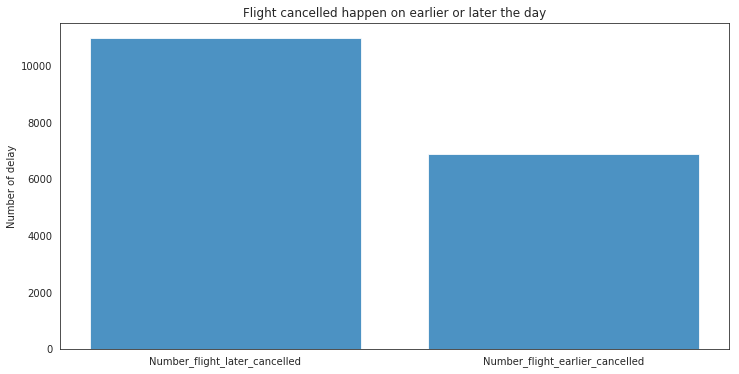

In [34]:
plt.figure(figsize=(12,6))
sns.set_style('white')


objects = ('Number_flight_later_cancelled','Number_flight_earlier_cancelled')
y_pos = np.arange(len(objects))
performance = [Later_cancellation,Earlier_cancellation]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Number of delay')
plt.title('Flight cancelled happen on earlier or later the day')

plt.show()


## #From above result and graph, we can see that there were 10966 cancelled flights that were scheduled to depature later than 12:00, while there were 6868 flights that were scheduled to depature no later than 12:00.So more flights that were scheduled to depature later in the day than 12:00 were cancelled  than flights that were scheduled to depature earlier in the day.

## Q5:Does the response to Claim 4 depend on the month of the year? (10 points)
#### The hypothesis for claim 4 will be used in the analysis
####  I will check the cancellation for flights by group cancelled flights bymonth of the year
#### Then I will check the  flights cancelled of early and later in the day to see the pattern.

In [35]:
cancellation.groupby('MONTH').count().sort_values(by='YEAR')

,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
MONTH,,,,,,,,,,,,,,,,,,,,,
9,422,422,422,422,422,357,422,422,422,23,...,0,422,422,422,0,0,0,0,0,422
10,479,479,479,479,479,406,479,479,479,19,...,0,479,479,479,0,0,0,0,0,479
4,898,898,898,898,898,781,898,898,898,56,...,0,898,898,898,0,0,0,0,0,898
11,912,912,912,912,912,809,912,912,912,59,...,0,912,912,912,0,0,0,0,0,912
8,941,941,941,941,941,805,941,941,941,60,...,0,941,941,941,0,0,0,0,0,941
7,985,985,985,985,985,824,985,985,985,74,...,0,985,985,985,0,0,0,0,0,985
5,1162,1162,1162,1162,1162,1046,1162,1162,1162,79,...,0,1162,1162,1162,0,0,0,0,0,1162
12,1587,1587,1587,1587,1587,1374,1587,1587,1587,74,...,0,1587,1587,1587,0,0,0,0,0,1587
6,1759,1759,1759,1759,1759,1470,1759,1759,1759,71,...,0,1759,1759,1759,0,0,0,0,0,1759


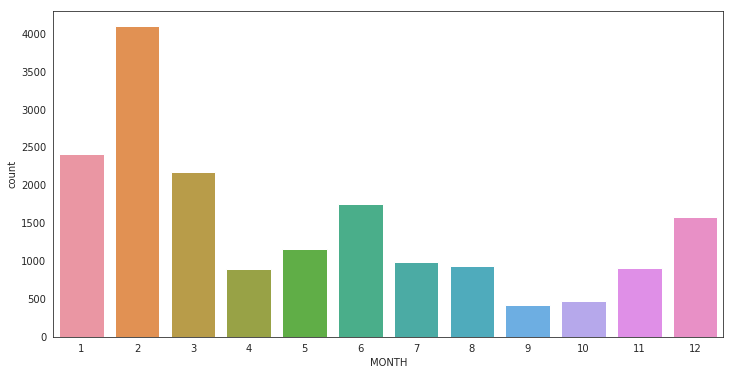

In [36]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='MONTH', data=cancellation)

In [37]:
EarlierDayCancelled_Month=cancellation[cancellation['SCHEDULED_DEPARTURE']<=1200].groupby('MONTH').count()
EarlierDayCancelled_Month.rename(columns = {'CANCELLED':'Monthly_Number_flight_cancelled_earlier'},inplace=True)
EarlierDayCancelled_Month

,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,Monthly_Number_flight_cancelled_earlier,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
MONTH,,,,,,,,,,,,,,,,,,,,,
1,1070,1070,1070,1070,1070,796,1070,1070,1070,33,...,0,1070,1070,1070,0,0,0,0,0,1070
2,1715,1715,1715,1715,1715,1388,1715,1715,1715,36,...,0,1715,1715,1715,0,0,0,0,0,1715
3,897,897,897,897,897,725,897,897,897,12,...,0,897,897,897,0,0,0,0,0,897
4,356,356,356,356,356,303,356,356,356,16,...,0,356,356,356,0,0,0,0,0,356
5,401,401,401,401,401,348,401,401,401,18,...,0,401,401,401,0,0,0,0,0,401
6,535,535,535,535,535,415,535,535,535,13,...,0,535,535,535,0,0,0,0,0,535
7,354,354,354,354,354,291,354,354,354,28,...,0,354,354,354,0,0,0,0,0,354
8,327,327,327,327,327,272,327,327,327,13,...,0,327,327,327,0,0,0,0,0,327
9,125,125,125,125,125,99,125,125,125,9,...,0,125,125,125,0,0,0,0,0,125


In [38]:
LaterDayCancelled_Month=cancellation[cancellation['SCHEDULED_DEPARTURE'] > 1200].groupby('MONTH').count()
LaterDayCancelled_Month.rename(columns = {'CANCELLED':'Monthly_Number_flight_cancelled_later'},inplace=True)
LaterDayCancelled_Month

,YEAR,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,Monthly_Number_flight_cancelled_later,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
MONTH,,,,,,,,,,,,,,,,,,,,,
1,1337,1337,1337,1337,1337,1083,1337,1337,1337,49,...,0,1337,1337,1337,0,0,0,0,0,1337
2,2386,2386,2386,2386,2386,2004,2386,2386,2386,54,...,0,2386,2386,2386,0,0,0,0,0,2386
3,1284,1284,1284,1284,1284,1089,1284,1284,1284,42,...,0,1284,1284,1284,0,0,0,0,0,1284
4,542,542,542,542,542,478,542,542,542,40,...,0,542,542,542,0,0,0,0,0,542
5,761,761,761,761,761,698,761,761,761,61,...,0,761,761,761,0,0,0,0,0,761
6,1224,1224,1224,1224,1224,1055,1224,1224,1224,58,...,0,1224,1224,1224,0,0,0,0,0,1224
7,631,631,631,631,631,533,631,631,631,46,...,0,631,631,631,0,0,0,0,0,631
8,614,614,614,614,614,533,614,614,614,47,...,0,614,614,614,0,0,0,0,0,614
9,297,297,297,297,297,258,297,297,297,14,...,0,297,297,297,0,0,0,0,0,297


Text(0.5,1,'Flight cancelled on later or earlier in the day by month')

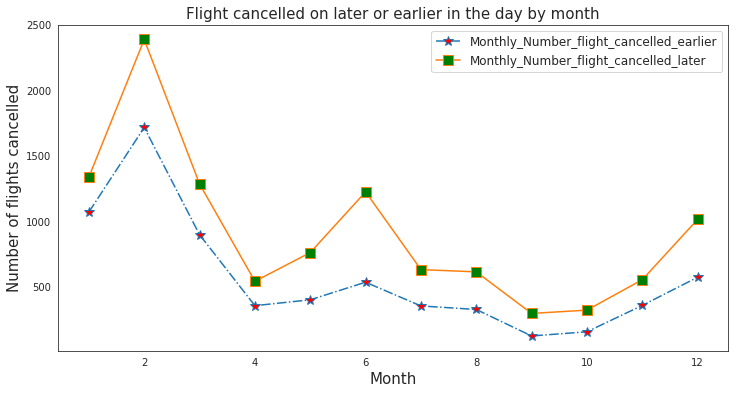

In [39]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(EarlierDayCancelled_Month.index,EarlierDayCancelled_Month['Monthly_Number_flight_cancelled_earlier'], 
          linestyle='-.',marker='*',markersize=10,markerfacecolor='red')
axes.plot(LaterDayCancelled_Month.index, LaterDayCancelled_Month['Monthly_Number_flight_cancelled_later'],
          marker='s',markersize=10,markerfacecolor='green')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of flights cancelled',fontsize = 15)
axes.set_xlabel('Month',fontsize = 15)
axes.set_title(label = 'Flight cancelled on later or earlier in the day by month',fontsize = 15)

### From first graph above, we can see that the September have the minimum flights cancelled,which is 422; while February have the maximum flights delays,which is 4101, which almost as ten times as the number of  flights cancelled in Sep. So we can conclude that the flights cancelled depend on the month of year.
### From the second graph, we can see that for each month there were more flights cancelled in the later of day than in the earlier of the day. 


## Q6:Does the response to Claim 4 depend on the airline? 

#### The hypothesis for claim 4 will be used in the analysis
####  We will check the cancellation for flights by group cancelled flights by airline
#### Then we will check the  flights cancelled of early and later in the day to see the pattern.


In [40]:
cancellation.groupby('AIRLINE').count().sort_values(by='YEAR')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
AIRLINE,,,,,,,,,,,,,,,,,,,,,
HA,30,30,30,30,30,4,30,30,30,4,...,0,30,30,30,0,0,0,0,0,30
VX,109,109,109,109,109,109,109,109,109,2,...,0,109,109,109,0,0,0,0,0,109
F9,112,112,112,112,112,8,112,112,112,8,...,0,112,112,112,0,0,0,0,0,112
AS,129,129,129,129,129,129,129,129,129,7,...,0,129,129,129,0,0,0,0,0,129
NK,415,415,415,415,415,415,415,415,415,11,...,0,415,415,415,0,0,0,0,0,415
DL,741,741,741,741,741,736,741,741,741,25,...,0,741,741,741,0,0,0,0,0,741
US,804,804,804,804,804,26,804,804,804,26,...,0,804,804,804,0,0,0,0,0,804
B6,867,867,867,867,867,867,867,867,867,11,...,0,867,867,867,0,0,0,0,0,867
UA,1284,1284,1284,1284,1284,80,1284,1284,1284,74,...,0,1284,1284,1284,0,0,0,0,0,1284


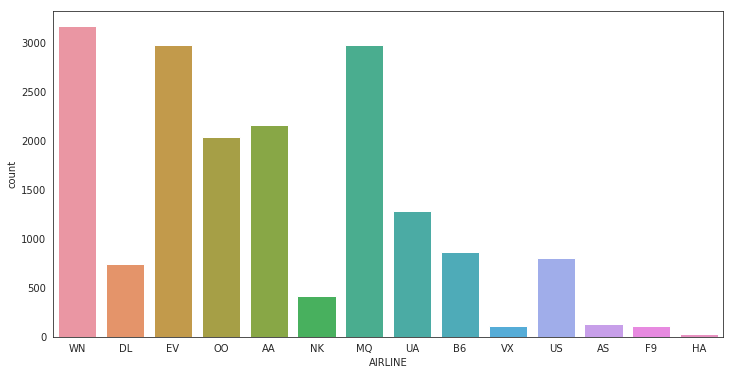

In [41]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='AIRLINE', data=cancellation)

In [42]:
LaterDayCanclled_AIRLINE=cancellation[cancellation['SCHEDULED_DEPARTURE']>1200].groupby('AIRLINE').count()
LaterDayCanclled_AIRLINE.rename(columns = {'CANCELLED':'AIRLINE_Number_flight_cancelled_later'},inplace=True)
LaterDayCanclled_AIRLINE.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'AIRLINE_Number_flight_cancelled_later',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE'],
      dtype='object')

In [43]:
EarlierDayCanclled_AIRLINE=cancellation[cancellation['SCHEDULED_DEPARTURE']<=1200].groupby('AIRLINE').count()
EarlierDayCanclled_AIRLINE.rename(columns = {'CANCELLED':'AIRLINE_Number_flight_cancelled_ealier'},inplace=True)
EarlierDayCanclled_AIRLINE

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,AIRLINE_Number_flight_cancelled_ealier,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE
AIRLINE,,,,,,,,,,,,,,,,,,,,,
AA,914,914,914,914,914,751,914,914,914,43,...,0,914,914,914,0,0,0,0,0,914
AS,48,48,48,48,48,48,48,48,48,3,...,0,48,48,48,0,0,0,0,0,48
B6,363,363,363,363,363,363,363,363,363,5,...,0,363,363,363,0,0,0,0,0,363
DL,288,288,288,288,288,283,288,288,288,11,...,0,288,288,288,0,0,0,0,0,288
EV,971,971,971,971,971,958,971,971,971,27,...,0,971,971,971,0,0,0,0,0,971
F9,35,35,35,35,35,2,35,35,35,2,...,0,35,35,35,0,0,0,0,0,35
HA,12,12,12,12,12,1,12,12,12,1,...,0,12,12,12,0,0,0,0,0,12
MQ,1078,1078,1078,1078,1078,1072,1078,1078,1078,56,...,0,1078,1078,1078,0,0,0,0,0,1078
NK,135,135,135,135,135,135,135,135,135,4,...,0,135,135,135,0,0,0,0,0,135


Text(0.5,1,'Flight cancelled on later or earlier in the day by Airline')

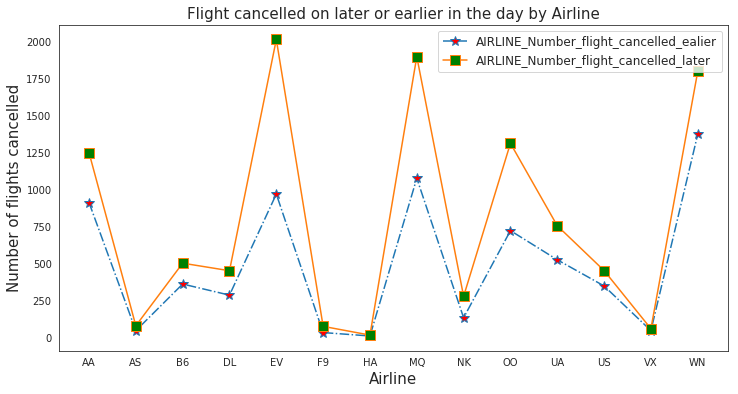

In [73]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(EarlierDayCanclled_AIRLINE.index,EarlierDayCanclled_AIRLINE['AIRLINE_Number_flight_cancelled_ealier'], 
          linestyle='-.',marker='*',markersize=10,markerfacecolor='red')
axes.plot(LaterDayCanclled_AIRLINE.index, LaterDayCanclled_AIRLINE['AIRLINE_Number_flight_cancelled_later'],
          marker='s',markersize=10,markerfacecolor='green')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of flights cancelled',fontsize = 15)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Flight cancelled on later or earlier in the day by Airline',fontsize = 15)

Text(0.5,1,'Difference between Flight cancelled on later or earlier in the day by Airline')

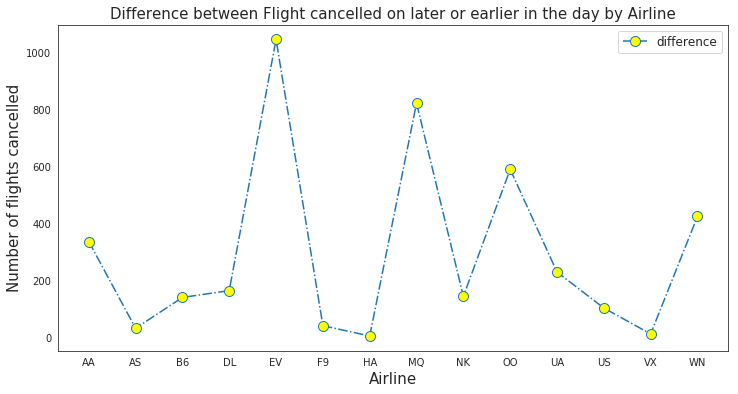

In [82]:

LaterDayCanclled_AIRLINE['difference']=LaterDayCanclled_AIRLINE['AIRLINE_Number_flight_cancelled_later']-EarlierDayCanclled_AIRLINE['AIRLINE_Number_flight_cancelled_ealier']

figure, axes = plt.subplots(figsize = (12,6))
axes.plot(LaterDayCanclled_AIRLINE.index,LaterDayCanclled_AIRLINE['difference'], 
          linestyle='-.',marker='o',markersize=10,markerfacecolor='yellow')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of flights cancelled',fontsize = 15)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Difference between Flight cancelled on later or earlier in the day by Airline',fontsize = 15)



### From first graph above, we can see that the HA have the minimum flights cancelled,which is just 30; while WN have the maximum flights cancelled,which is 3175, which is more than 100  times as the number of flights cancelled by HA. Meanhwile, the number of flights cancelled by airline EV and MQ are 2987 and 2978 respectivly.   So we can conclude that the flights cancelled depend on  the airline.
### From the second and thirs graphs above, we can see that we can see that for each aieline there were more flights cancelled in the later of day than in the earlier of the day.  Especially for airline EV,MQ and CO

## Q7: State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states have lowest and highest flight delays. 


####  I will check the delays for flights by group delayed flights by state
#### Then I will check the  average flight delays  to see the pattern.



In [46]:
Airport_Flights.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [47]:
Airport_Flights_Delays=Airport_Flights_1[Airport_Flights_1['ARRIVAL_DELAY']>0]

In [48]:
Sates_mean_Delays=Airport_Flights_Delays.groupby('STATE').mean()


In [49]:
Airport_Flights.groupby('STATE').mean().sort_values(by='ARRIVAL_DELAY').tail(3)

,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
STATE,,,,,,,,,,,,,,,,,,,,,
WV,38.37315,-81.59319,2015.0,6.008180,15.846626,3.820041,4510.408998,1493.658487,1507.489540,12.531381,...,1702.912065,1675.631027,10.730526,0.006135,0.022495,10.579439,0.0,25.579439,22.897196,6.542056
DE,39.67872,-75.60653,2015.0,2.548387,14.032258,3.774194,1252.903226,1348.580645,1364.900000,18.866667,...,1580.161290,1595.833333,18.933333,0.000000,0.032258,21.333333,0.0,17.833333,15.333333,0.000000
GU,13.48345,-144.79598,2015.0,5.863014,15.410959,3.904110,201.000000,1429.109589,1446.861111,31.305556,...,1814.931507,1816.486111,24.055556,0.000000,0.013699,7.863636,0.0,56.772727,23.454545,0.000000


In [50]:
Sates_mean_Delays.head(5)
Sates_mean_Delays_1=Sates_mean_Delays.reset_index()

In [51]:
Sates_mean_Delays.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE,LONGITUDE
STATE,,,,,,,,,,,,,,,,,,,,,
AK,2015.0,6.570985,15.401862,3.986424,366.050039,1507.340186,1509.714895,20.714507,15.351823,1516.812258,...,25.516292,0.0,0.0,8.015831,0.649077,16.511873,22.714160,2.042216,60.791011,-146.138204
AL,2015.0,5.993723,15.616610,3.814099,3731.638339,1503.421535,1525.394013,26.936263,20.799131,1549.090295,...,29.751328,0.0,0.0,9.057617,0.082031,21.120117,20.009766,3.548828,32.865000,-86.945665
AR,2015.0,5.911351,15.972432,3.827568,3689.877297,1489.992432,1527.903243,30.797297,21.475135,1555.454054,...,33.809730,0.0,0.0,9.404573,0.118290,20.068588,21.394632,5.791252,35.391950,-93.353627
AS,2015.0,9.666667,14.000000,2.333333,465.000000,1645.000000,1728.333333,43.333333,19.333333,1761.000000,...,69.000000,0.0,0.0,0.000000,0.000000,102.000000,0.000000,0.000000,14.331020,-170.710530
AZ,2015.0,6.095910,15.669920,3.940550,1712.732032,1400.097362,1424.769138,24.620150,18.120432,1447.913366,...,27.553602,0.0,0.0,9.127825,0.115643,18.400247,22.726871,2.561794,33.309478,-111.923583


In [52]:
Airport_Flights_Delays.groupby('STATE').mean().sort_values(by='ARRIVAL_DELAY').tail(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE,LONGITUDE
STATE,,,,,,,,,,,,,,,,,,,,,
NJ,2015.0,6.197862,15.475391,3.770942,2192.677852,1412.081904,1452.471912,40.752921,20.261124,1474.085260,...,42.226075,0.0,0.0,26.270424,0.029132,14.578003,23.750686,2.56217,40.631809,-74.202858
GU,2015.0,4.813953,13.116279,3.744186,201.000000,1429.186047,1455.395349,50.395349,20.395349,1492.534884,...,48.465116,0.0,0.0,7.863636,0.000000,56.772727,23.454545,0.00000,13.483450,-144.795980
AS,2015.0,9.666667,14.000000,2.333333,465.000000,1645.000000,1728.333333,43.333333,19.333333,1761.000000,...,69.000000,0.0,0.0,0.000000,0.000000,102.000000,0.000000,0.00000,14.331020,-170.710530


In [53]:
Airport_Flights_Delays.groupby('STATE').mean().sort_values(by='ARRIVAL_DELAY').head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE,LONGITUDE
STATE,,,,,,,,,,,,,,,,,,,,,
HI,2015.0,5.753562,15.456236,4.082915,418.426516,1308.579183,1330.635364,15.987515,14.310083,1354.357850,...,21.201384,0.0,0.0,5.188715,0.044224,26.438048,16.134197,1.183759,21.027666,-157.361624
AK,2015.0,6.570985,15.401862,3.986424,366.050039,1507.340186,1509.714895,20.714507,15.351823,1516.812258,...,25.516292,0.0,0.0,8.015831,0.649077,16.511873,22.714160,2.042216,60.791011,-146.138204
MT,2015.0,6.492278,15.472973,4.052124,4329.993243,1499.111004,1518.975869,23.648649,22.595560,1549.177606,...,25.910232,0.0,0.0,7.820896,0.004264,23.208955,16.415778,2.731343,46.576114,-111.620076


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



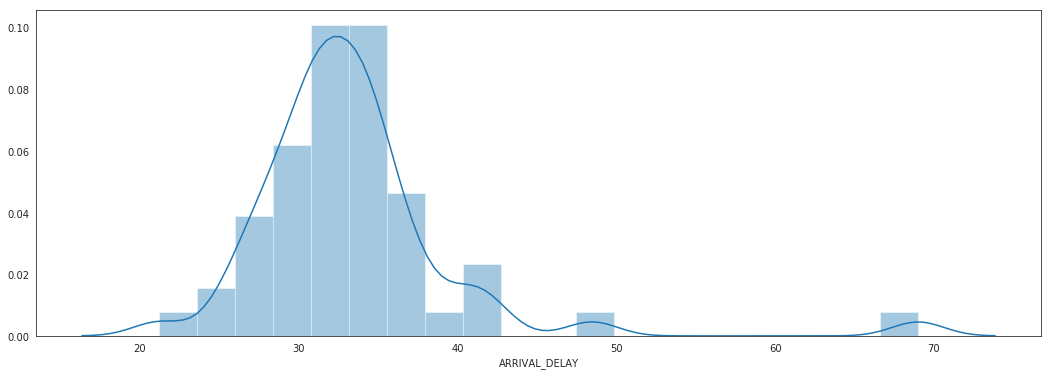

In [54]:
plt.figure(figsize=(18,6))
sns.set_style('white')
#sns.barplot(y='ARRIVAL_DELAY',x='STATE',data='Airport_Flights_Delays')
sns.distplot(Sates_mean_Delays_1['ARRIVAL_DELAY'])

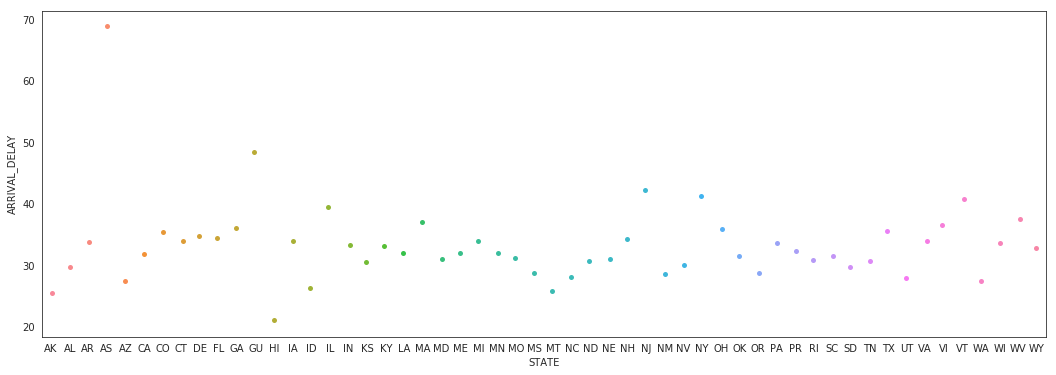

In [55]:
plt.figure(figsize=(18,6))
sns.set_style('white')
sns.stripplot(x="STATE",y="ARRIVAL_DELAY", data=Sates_mean_Delays_1)

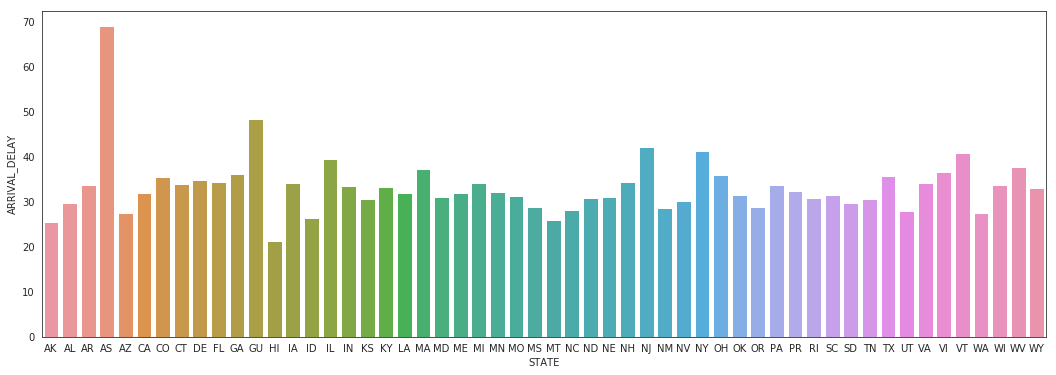

In [56]:
plt.figure(figsize=(18,6))
sns.set_style('white')

sns.barplot(x="STATE",y="ARRIVAL_DELAY", data=Sates_mean_Delays_1)


In [85]:

delay_factors = Airport_Flights_1.groupby(['STATE'])[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].mean()

delay_factors['Total_delay_mean'] = delay_factors['AIR_SYSTEM_DELAY']+delay_factors['SECURITY_DELAY']+delay_factors['AIRLINE_DELAY']+delay_factors['LATE_AIRCRAFT_DELAY']+delay_factors['WEATHER_DELAY']
delay_factors.sort_values('Total_delay_mean',inplace = True)
delay_factors.head(3)
#delay_factors.tail(3)



,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Total_delay_mean
STATE,,,,,,
HI,5.188715,0.044224,26.438048,16.134197,1.183759,48.988944
AK,8.015831,0.649077,16.511873,22.714160,2.042216,49.933157
ID,6.245734,0.069966,19.459044,22.933447,1.464164,50.172355


In [90]:
AFD=Airport_Flights_Delays.groupby('STATE').mean()
#AFD.head(3)
AFD.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [58]:

Airport_Flights_1.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE_x', 'IATA_CODE_y',
       'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [59]:
mask=(Airport_Flights_1['ARRIVAL_TIME']>=1200)# | (Airport_Flights_1['AIRLINE']=='EV') | (Airport_Flights_1['AIRLINE']=='MQ') | (Airport_Flights_1['AIRLINE']=='WN')
df=Airport_Flights_1[mask]

In [60]:
df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,12,9,3,AA,1445,N860AA,SAN,DFW,1430,...,NaN,NaN,DFW,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
1,2015,1,24,6,DL,2134,N124DE,MSP,PHX,1120,...,NaN,NaN,PHX,PHX,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
2,2015,8,12,3,DL,1429,N607AT,TUL,ATL,1237,...,NaN,NaN,ATL,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
3,2015,2,24,2,OO,7398,N565SW,SLC,VEL,1705,...,NaN,NaN,VEL,VEL,Valdez Airport,Vernal,UT,USA,40.44090,-109.50992
4,2015,2,6,5,MQ,2948,N3AEMQ,AMA,DFW,1958,...,NaN,NaN,DFW,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720


In [61]:
df.groupby('STATE').count().sort_values(by='YEAR').head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,IATA_CODE_y,AIRPORT,CITY,COUNTRY,LATITUDE,LONGITUDE
STATE,,,,,,,,,,,,,,,,,,,,,
AS,18,18,18,18,18,18,18,18,18,18,...,1,1,1,18,18,18,18,18,18,18
DE,20,20,20,20,20,20,20,20,20,20,...,10,10,10,20,20,20,20,20,20,20
GU,72,72,72,72,72,72,72,72,72,72,...,22,22,22,72,72,72,72,72,72,72


In [62]:
#df['delayed']=df[df['ARRIVAL_DELAY']>0].groupby('STATE').count()
df[df['ARRIVAL_DELAY']>0].groupby('STATE').count().sort_values(by='YEAR').head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,IATA_CODE_y,AIRPORT,CITY,COUNTRY,LATITUDE,LONGITUDE
STATE,,,,,,,,,,,,,,,,,,,,,
AS,2,2,2,2,2,2,2,2,2,2,...,1,1,1,2,2,2,2,2,2,2
DE,14,14,14,14,14,14,14,14,14,14,...,10,10,10,14,14,14,14,14,14,14
GU,43,43,43,43,43,43,43,43,43,43,...,22,22,22,43,43,43,43,43,43,43
VT,174,174,174,174,174,174,174,174,174,174,...,90,90,90,174,174,174,174,174,174,174
WV,176,176,176,176,176,176,176,176,176,176,...,96,96,96,176,176,176,176,176,176,176


In [63]:
df_delayed=df[df['ARRIVAL_DELAY']>0].groupby('STATE').count()


In [64]:
#df['dealyed']=df[df['ARRIVAL_DELAY']>0].groupby('STATE').count()
df_delayed['YEAR'].head(3)

STATE
AK    1854
AL    1646
AR    1454
Name: YEAR, dtype: int64

In [65]:
AF_Delay=Airport_Flights_1[Airport_Flights_1['ARRIVAL_DELAY']>0].groupby('STATE').count()

In [66]:
#flights_1[(flights_1['AIRLINE']=='AS') & (flights_1['ARRIVAL_DELAY']>0)].count()

In [67]:
AF_Delay.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,IATA_CODE_y,AIRPORT,CITY,COUNTRY,LATITUDE,LONGITUDE
STATE,,,,,,,,,,,,,,,,,,,,,
AK,2578,2578,2578,2578,2578,2578,2578,2578,2578,2578,...,1137,1137,1137,2578,2578,2578,2578,2578,2578,2578
AL,2071,2071,2071,2071,2071,2071,2071,2071,2071,2071,...,1024,1024,1024,2071,2071,2071,2071,2071,2071,2071
AR,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850,...,1006,1006,1006,1850,1850,1850,1850,1850,1850,1850
AS,3,3,3,3,3,3,3,3,3,3,...,2,2,2,3,3,3,3,3,3,3
AZ,12397,12397,12397,12397,12397,12397,12397,12397,12397,12397,...,5664,5664,5664,12397,12397,12397,12397,12397,12397,12397


In [77]:
cf_delay= pd.DataFrame(dict(df_delay = df_delayed['YEAR'], AF_Delay= AF_Delay['YEAR']))
cf_delay['delay_rate']=cf_delay['df_delay']/cf_delay['AF_Delay']

In [79]:
cf_delay.sort_values(by='df_delay').head(5)

,df_delay,AF_Delay,delay_rate
STATE,,,
AS,2,3,0.666667
DE,14,20,0.700000
GU,43,43,1.000000
VT,174,231,0.753247
WV,176,202,0.871287


In [95]:
cf_delay.sort_values(by='df_delay').tail(3)

,df_delay,AF_Delay,delay_rate
STATE,,,
FL,22949,31188,0.735828
TX,34466,45883,0.751171
CA,38591,50503,0.764133


Text(0.5,1,'Flight cancelled on later or earlier in the day by Airline')

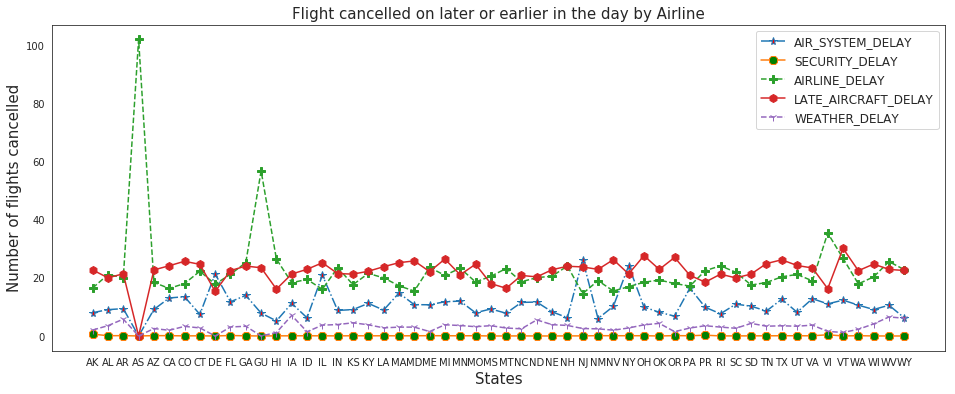

In [99]:
figure, axes = plt.subplots(figsize = (16,6))

axes.plot(AFD.index,AFD['AIR_SYSTEM_DELAY'], 
          linestyle='-.',marker='*',markersize=8,markerfacecolor='red')
axes.plot(AFD.index, AFD['SECURITY_DELAY'],
          marker='8',markersize=8,markerfacecolor='green')

axes.plot(AFD.index,AFD['AIRLINE_DELAY'], 
          linestyle='--',marker="P",markersize=8)
axes.plot(AFD.index, AFD['LATE_AIRCRAFT_DELAY'],
          marker="h",markersize=8)
axes.plot(AFD.index,AFD['WEATHER_DELAY'], 
          linestyle='--',marker="1",markersize=8)

axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of flights cancelled',fontsize = 15)
axes.set_xlabel('States',fontsize = 15)
axes.set_title(label = 'Flight cancelled on later or earlier in the day by Airline',fontsize = 15)

### From the analysis above, we can see that states HI,AK, MT have the lowest  average flight delay, while states AS,GU,NJ have highest average flight delay.

### For top three states with highest average flight delay, we can see that the number of flights that were delayed is small, while for these delayed flights, most of them are flights that arrived destination in the later of day. while flights that arrived destination in the later of day were more likely to delay then the flights that arrived destination in the earlier of day. So if one flights delayed much time, it could cause average flight delay increase a lot.

### From the above graph, we can see that states AS,GU have very high airline delay, while NJ have high  airline system delay which caused them high average flight delay.

### While for states HI,AK, MT, all of them have low air system delay, security delay, airline delay, late aircraft delay and weather delay, which caused them low average flight delay
     

### 3.3 Bonus Points Opportunity : We investigated above if there is a pattern that the delays in the flights happen more often as the day progresses. Explore and find more interesting patterns (not necessarily based on delays or cancellations) from the data. This bonus question is only to pick your analytical and creative mind. Although this data (airlines.csv, flights_20_perc.csv, airports.csv) is your primary data, you may chose to combine other supplementary datasets for your analysis.

#### We want to check if delays at arrival are differ from delays at departure

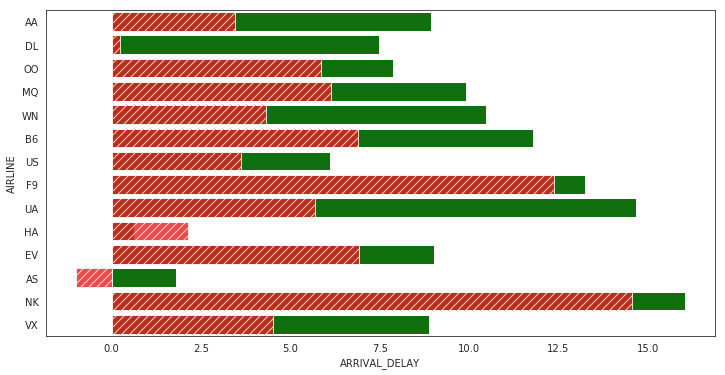

In [69]:
fig = plt.figure(1, figsize=(12,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=flights, color="green", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=flights, color="r", hatch = '///',
                 alpha = 0.8, ci=None)

### From above graph, we can see that delays at arrival are generally lower than at departure. This is because airlines adjust their flight speed in order to reduce the delays at arrival. 

#### We want to know more detail information for the delays of each airline. We assume that different airelines have different delay situation. So we will segment  delay into three categories:  delayed  less than 10 minutes,  10 to  60min, and  greater than 60 minutes

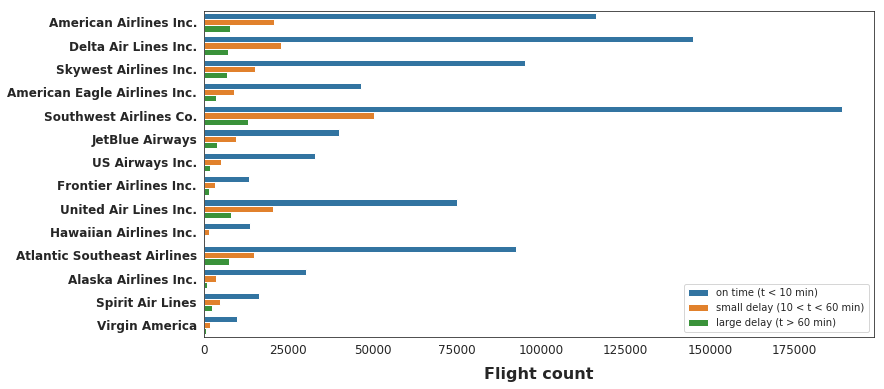

In [84]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()


delay_type = lambda x:((0,1)[x > 10],2)[x > 60]
flights['DELAY_LEVEL'] = flights['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(12,6))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights)

labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 10 min)')
L.get_texts()[1].set_text('small delay (10 < t < 60 min)')
L.get_texts()[2].set_text('large delay (t > 60 min)')
plt.show()


### From above figure, we can see the flights that delayed  less than 10 minutes,  10 to 60min, and  greater than 60 minutes. Flights that delayed greater than 60  minutes only account for a few percents.
### However, the proportion of delays in these three groups depends on the airline: for example in the case of SkyWest Airlines, the delays greater than 60 minutes are only lower by  about 30% with respect to delays in the range 10 < t < 60 min. Things are better for SoutWest Airlines since delays greater than 60 minutes are 4 times less frequent than delays in the range 10< t < 60 min.